# Exercise 31 
Consider the flight path in 

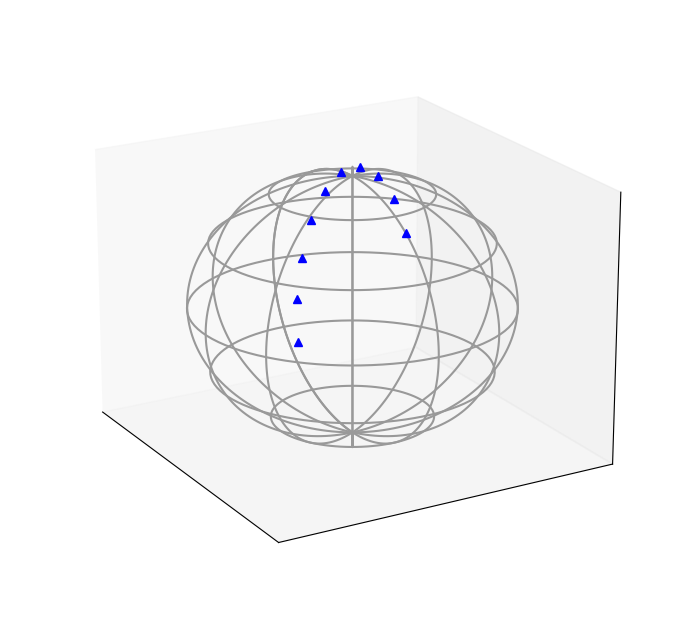

Imagine a very long flight between two cities that are almost antipodal, such as London $(51.5 \degree N,0 \degree)$ and Auckland $(37\degree S,175\degree E)$. Although Auckland is SE of London, the shortest route from London is to head almost due North Fig. 7.1 illustrates Shortest paths on a sphere, like this one, are called great circles. They are like arcs on the equators, but with a different tilt. To trace a great circle, you start out in a particular direction and then keep going on the sphere. 


The path is given by a numerical integration of the equations

$$
\dot{\theta} = p_\theta, \quad
\dot{\phi} = \frac{p_\phi}{\sin^2 \theta}, \quad
\dot{p_\theta} = \frac{\cos \theta}{\sin^3 \theta} p_\phi^2, \quad
\dot{p_\phi} = 0.
$$


The initial and final values of 

- Initial position: $ t = 0, \theta = 38.5^\circ, \phi = 0^\circ $.
- Final position: $ t = 1, \theta = 127^\circ, \phi = 175^\circ $.


 are given, but the initial values of the momenta $p_\theta$ and $p_\phi$ are missing. Reconstruct the two missing values by doing your own numerical integrations with trial values.

## Solution Approach
### Step 1: Numerical Integration
We integrate the equations of motion forward in time using numerical methods (e.g., Runge-Kutta). For given trial values of $p_\theta$ and $p_\phi$, the equations are solved to determine the trajectory of $\theta$ and $\phi$.

### Step 2: Error Function
An error function is defined to compare the computed final values with the target values:

$$
\text{Error} = \sqrt{(\theta_\text{final} - \theta_\text{target})^2 + (\phi_\text{final} - \phi_\text{target})^2}.
$$

The goal is to minimize this error.

### Step 3: Optimization
An optimization algorithm (e.g., Nelder-Mead) is used to adjust $p_\theta$ and $p_\phi$ at $t = 0$ to minimize the error. The final optimized values are the desired initial conditions.

## Tools and Methods
- **Integration Method:** Runge-Kutta method implemented using `scipy.integrate.solve_ivp`.
- **Optimization Method:** Nelder-Mead algorithm from `scipy.optimize.minimize`.

This approach ensures that the trajectory satisfies the equations of motion and matches the given final conditions.

In [24]:
import numpy as np
import random
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt


In [25]:
# Equations of motion
def equations(t, y):
    theta, phi, p_theta, p_phi = y
    
    dtheta_dt = p_theta
    dphi_dt = p_phi / (np.sin(theta)**2)
    dp_theta_dt = (np.cos(theta) / (np.sin(theta)**3)) * (p_phi**2)
    dp_phi_dt = 0

    return [dtheta_dt, dphi_dt, dp_theta_dt, dp_phi_dt]

[solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) odm solver
Here t is a 1-D independent variable (time), y(t) is an N-D vector-valued function (state), and an N-D vector-valued function f(t, y) determines the differential equations. The goal is to find y(t) approximately satisfying the differential equations, given an initial value y(t0)=y0.

In [26]:
# Function to minimize
def objective(initial_conditions):
    p_theta_0, p_phi_0 = initial_conditions
    
    # Initial conditions: t=0, theta=38.5 degrees, phi=0 degrees
    # theta, phi, p_theta, p_phi = y
    y0 = [np.radians(38.5), 0, p_theta_0, p_phi_0]
    
    t_span = (0, 1)

    # Solve an initial value problem for a system of ODEs.
    sol = solve_ivp(equations, t_span, y0, t_eval=[1])
    theta_final, phi_final = sol.y[0, -1], sol.y[1, -1]

    # Target final values: theta=127 degrees, phi=175 degrees
    theta_target = np.radians(127)
    phi_target = np.radians(175)

    # Error function
    error = np.sqrt((theta_final - theta_target)**2 + (phi_final - phi_target)**2)
    return error

In [33]:
initial_guess = [0.5, 1]

# Minimize the objective function
result = minimize(objective, initial_guess, method='Nelder-Mead')

# Extract the optimized initial conditions
p_theta_optimized, p_phi_optimized = result.x

# Print the results
print(f"Optimized initial conditions:")
print(f"p_theta_0 = {p_theta_optimized}")
print(f"p_phi_0 = {p_phi_optimized}")


Optimized initial conditions:
p_theta_0 = -2.78576287540843
p_phi_0 = 0.5144146262315392


In [34]:
best_result = None
best_error = float('inf')
all_results = []

for i in range(10):
    initial_guess = [random.uniform(-100, 100), random.uniform(-100, 100)]
    result = minimize(objective, initial_guess, method='Nelder-Mead')
    all_results.append((result.x[0], result.x[1], result.fun))
    
    if result.fun < best_error:
        best_error = result.fun
        best_result = result

p_theta_best, p_phi_best = best_result.x

print(f"Best optimized initial conditions from 20 random trials:")
print(f"p_theta_0 = {p_theta_best}")
print(f"p_phi_0 = {p_phi_best}")
print(f"Minimum error = {best_error}")

print("\nAll optimization results (p_theta_0, p_phi_0, error):")
for idx, (p_theta, p_phi, error) in enumerate(all_results, 1):
    print(f"Trial {idx}: p_theta_0 = {p_theta}, p_phi_0 = {p_phi}, error = {error}")


Best optimized initial conditions from 20 random trials:
p_theta_0 = -2.7644838569715993
p_phi_0 = 0.5206239312646894
Minimum error = 9.230053248550014e-06

All optimization results (p_theta_0, p_phi_0, error):
Trial 1: p_theta_0 = -2.7644838569715993, p_phi_0 = 0.5206239312646894, error = 9.230053248550014e-06
Trial 2: p_theta_0 = 6.909107068537871, p_phi_0 = 0.28220918362713243, error = 3.3855535531943874
Trial 3: p_theta_0 = -85.246540884535, p_phi_0 = 2.448740077917783, error = 21.8105856829401
Trial 4: p_theta_0 = -24.901474350929895, p_phi_0 = 0.3447986760806316, error = 4.074990128873648
Trial 5: p_theta_0 = -73.40049664721826, p_phi_0 = -1.7483784841626326, error = 19.119316775420117
Trial 6: p_theta_0 = 82.7414693737893, p_phi_0 = 0.44617240111893597, error = 6.782238343871682
Trial 7: p_theta_0 = -2.764479346980898, p_phi_0 = 0.5205935380936986, error = 9.855690384137709e-06
Trial 8: p_theta_0 = -108.95258138191548, p_phi_0 = 2.1824244830990995, error = 16.621170400515112
Tri

ouptut:
Best optimized initial conditions from 20 random trials:
p_theta_0 = 35.79769373981463
p_phi_0 = 0.9977810022982625
Minimum error = 6.752518018313245

All optimization results (p_theta_0, p_phi_0, error):

- Trial 1: p_theta_0 = -138.24106170193295, p_phi_0 = 1.0615401164633753, error = 10.514743145177071
- Trial 2: p_theta_0 = -54.614693110410585, p_phi_0 = 412.59987037308747, error = 748.987975512915
- Trial 3: p_theta_0 = 153.91921218595667, p_phi_0 = -846.4073888637881, error = 1726.286634299603
- Trial 4: p_theta_0 = -99.49066330705503, p_phi_0 = -541.2371382426819, error = 990.5406541799651
- Trial 5: p_theta_0 = 35.79769373981463, p_phi_0 = 0.9977810022982625, error = 6.752518018313245
- Trial 6: p_theta_0 = -222.54531351924308, p_phi_0 = 3.377008955093557, error = 28.541601322642155
- Trial 7: p_theta_0 = -317.95366260028015, p_phi_0 = -7.240518083959152, error = 64.20172255621976
- Trial 8: p_theta_0 = 145.82447715996074, p_phi_0 = -2.023898538740432, error = 25.183872625736342
- Trial 9: p_theta_0 = -135.28663820538958, p_phi_0 = 342.640043034941, error = 616.7051709051539
- Trial 10: p_theta_0 = 214.39909978699342, p_phi_0 = 1.3938695984755056, error = 12.930289995349689

In [35]:
p_theta_values = np.linspace(p_theta_best-10, p_theta_best+10, 100)
p_phi_values = np.linspace(p_phi_best-10, p_phi_best+10, 100)
errors = np.zeros((len(p_theta_values), len(p_phi_values)))

for i, p_theta in enumerate(p_theta_values):
    for j, p_phi in enumerate(p_phi_values):
        errors[i, j] = objective([p_theta, p_phi])

# Create a meshgrid for plotting
P_theta, P_phi = np.meshgrid(p_theta_values, p_phi_values)

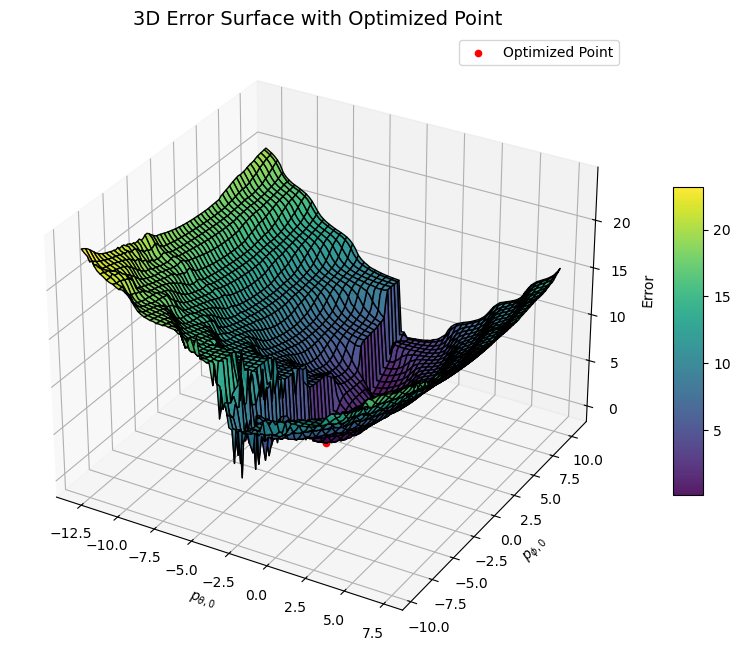

Optimized initial conditions:
p_theta_0 = -2.7644838569715993
p_phi_0 = 0.5206239312646894


In [36]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(P_theta, P_phi, errors, cmap="viridis", edgecolor='k', alpha=0.9)
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

# Plot the optimized point in red
ax.scatter(p_theta_best, p_phi_best, objective([p_theta_best, p_phi_best]), 
           color='red',  label="Optimized Point")

# Labels and title
ax.set_title("3D Error Surface with Optimized Point", fontsize=14)
ax.set_xlabel("$p_{\\theta,0}$")
ax.set_ylabel("$p_{\\phi,0}$")
ax.set_zlabel("Error")
ax.legend()

plt.show()

# Print the optimized initial conditions
print(f"Optimized initial conditions:")
print(f"p_theta_0 = {p_theta_best}")
print(f"p_phi_0 = {p_phi_best}")


In [37]:
objective([p_theta_optimized, p_phi_optimized])

0.0015351489189838836

In [43]:
import numpy as np

# Constants
Pt_dBm = 10 * np.log10(250) + 30  # Transmit power in dBm
Pr_dBm = -100  # Receiver sensitivity in dBm
Gt_dBi = 2  # Transmitter antenna gain in dBi
Gr_dBi = 2  # Receiver antenna gain in dBi
f_Hz = 400e6  # Frequency in Hz
c = 3e8  # Speed of light in m/s

# Free-space path loss formula for distance
path_loss_exponent = (Pt_dBm + Gt_dBi + Gr_dBi - Pr_dBm - 20 * np.log10(f_Hz) - 20 * np.log10(4 * np.pi / c)) / 20
distance_m = 10 ** path_loss_exponent

distance_km = distance_m / 1000  # Convert to kilometers
distance_km


4729.567234741503